In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-video/Sample_video_1.mp4


In [3]:
import time
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL
from PIL.ImageDraw import Draw
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
# Display image and videos
import cv2
import IPython
from IPython.display import Video, display
%matplotlib inline

In [5]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 11.4 MB/s eta 0:00:00a 0:00:01


In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

## Classes
names:
  0: person 
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

In [7]:
def show_properties(video_path):
    capture = cv2.VideoCapture(video_path)
    print("CV_CAP_PROP_FRAME_WIDTH: '{}'".format(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print("CV_CAP_PROP_FRAME_HEIGHT : '{}'".format(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print("CAP_PROP_FPS : '{}'".format(capture.get(cv2.CAP_PROP_FPS)))
    print("CAP_PROP_POS_MSEC : '{}'".format(capture.get(cv2.CAP_PROP_POS_MSEC)))
    print("CAP_PROP_FRAME_COUNT  : '{}'".format(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print("CAP_PROP_BRIGHTNESS : '{}'".format(capture.get(cv2.CAP_PROP_BRIGHTNESS)))
    print("CAP_PROP_CONTRAST : '{}'".format(capture.get(cv2.CAP_PROP_CONTRAST)))
    print("CAP_PROP_SATURATION : '{}'".format(capture.get(cv2.CAP_PROP_SATURATION)))
    print("CAP_PROP_HUE : '{}'".format(capture.get(cv2.CAP_PROP_HUE)))
    print("CAP_PROP_GAIN  : '{}'".format(capture.get(cv2.CAP_PROP_GAIN)))
    print("CAP_PROP_CONVERT_RGB : '{}'".format(capture.get(cv2.CAP_PROP_CONVERT_RGB)))

In [8]:
top_left=(1000,600)
bottom_right=(1600,1000)

(1080, 1920, 3)


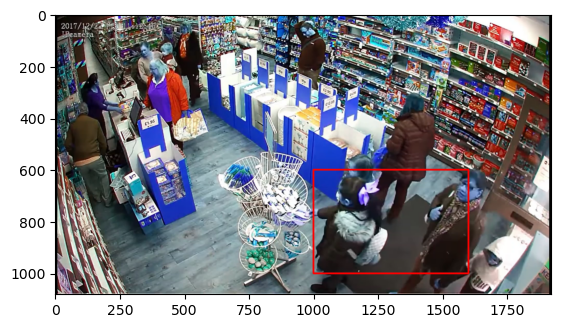

In [60]:
path="/kaggle/input/sample-video/Sample_video_1.mp4"
video=cv2.VideoCapture(path)
_,frame=video.read()
cv2.rectangle(frame,top_left,bottom_right,(255,0,0),5)
plt.imshow(frame)
print(frame.shape)
# plt.axis('off')

In [10]:
show_properties(path)

CV_CAP_PROP_FRAME_WIDTH: '1920.0'
CV_CAP_PROP_FRAME_HEIGHT : '1080.0'
CAP_PROP_FPS : '29.97002997002997'
CAP_PROP_POS_MSEC : '0.0'
CAP_PROP_FRAME_COUNT  : '2723.0'
CAP_PROP_BRIGHTNESS : '0.0'
CAP_PROP_CONTRAST : '0.0'
CAP_PROP_SATURATION : '0.0'
CAP_PROP_HUE : '0.0'
CAP_PROP_GAIN  : '0.0'
CAP_PROP_CONVERT_RGB : '1.0'


In [34]:
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))

In [35]:
height,width

(1080, 1920)

In [74]:
class Detect():
  def __init__(self,path,model):
    self.path=path
    self.model=model
  def resize_frame(self,frame, scale_percent):
    """Function to resize an image in a percent scale"""
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    return resized
  def detect_people (self,verbose=False): # default set verbose as False

      ### Configurations
      dict_classes = self.model.model.names
      # Scaling percentage of original frame
      scale_percent = 50


      #-------------------------------------------------------
      # Reading video with cv2
      video = cv2.VideoCapture(path)

      # Objects to detect Yolo
      class_IDS = [0] # 0 denotes person in the coco dataset
    
      # Original informations of video
      height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
      width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
      fps = video.get(cv2.CAP_PROP_FPS)
      print('[INFO] - Original Dim: ', (width, height))
        
      # Auxiliary variables
      centers_old = {}
      centers_new = {}
      obj_id = 0 #denotes the id of the object
      veiculos_contador_in = dict.fromkeys(class_IDS, 0)
      veiculos_contador_out = dict.fromkeys(class_IDS, 0)
      frames_list = [] # stores the frames
      cy_linha = int(800 * scale_percent/100 )
      cx_sentido = int(width * scale_percent/100)
      offset = int(5 * scale_percent/100 )
      contador_in = 0
      contador_out = 0
      print(f'[INFO] - Verbose during Prediction: {verbose}')


      

      # Scaling Video for better performance
      if scale_percent != 100:
          print('[INFO] - Scaling change may cause errors in pixels lines ')
          width = int(width * scale_percent / 100)
          height = int(height * scale_percent / 100)
          print('[INFO] - Dim Scaled: ', (width, height))


      #-------------------------------------------------------
      ### Video output ####
      video_name = 'result.mp4'
      output_path = os.path.join("/kaggle/working/",video_name) 
      VIDEO_CODEC = "MP4V"
    
      output_video=cv2.VideoWriter(output_path,cv2.VideoWriter_fourcc(*VIDEO_CODEC),fps,(width, height))

      #-------------------------------------------------------
      # Executing Recognition
      num_frames= int(video.get(cv2.CAP_PROP_FRAME_COUNT))
      for i in tqdm(range(num_frames)):

          # reading frame from video
          _, frame = video.read()

          #Applying resizing of read frame
          frame  = self.resize_frame(frame, scale_percent)

          if verbose:
              print('Dimension Scaled(frame): ', (frame.shape[1], frame.shape[0]))

          # Getting predictions
          y_hat = model.predict(frame, conf = 0.7, classes = class_IDS, device = 0, verbose = False)

          # Getting the bounding boxes, confidence and classes of the recognize objects in the current frame.
          boxes   = y_hat[0].boxes.xyxy.cpu().numpy()
          conf    = y_hat[0].boxes.conf.cpu().numpy()
          classes = y_hat[0].boxes.cls.cpu().numpy()

          # Storing the above information in a dataframe
          positions_frame = pd.DataFrame(y_hat[0].cpu().numpy().boxes.data, columns = ['xmin', 'ymin', 'xmax', 'ymax', 'conf', 'class'])

          #Translating the numeric class labels to text
          labels = [dict_classes[i] for i in classes]

          # Drawing transition line for in\out vehicles counting
          cv2.line(frame, (0, cy_linha), (int(4500 * scale_percent/100 ), cy_linha), (255,255,0),8)

          # For each person, draw the bounding-box and counting each one the pass thought the transition line (in\out)
          for ix, row in enumerate(positions_frame.iterrows()):
              # Getting the coordinates of each vehicle (row)
              xmin, ymin, xmax, ymax, confidence, category,  = row[1].astype('int')

              # Calculating the center of the bounding-box
              center_x, center_y = int(((xmax+xmin))/2), int((ymax+ ymin)/2)

              # drawing center and bounding-box of people in the given frame
              cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (255,0,0), 5) # box
              cv2.circle(frame, (center_x,center_y), 5,(255,0,0),-1) # center of box

              #Drawing above the bounding-box the name of class recognized.
              cv2.putText(img=frame, text=labels[ix]+' - '+str(np.round(conf[ix],2)),
                          org= (xmin,ymin-10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 0, 0),thickness=2)

              # Checking if the center of recognized vehicle is in the area given by the transition line + offset and transition line - offset
              if (center_y < (cy_linha + offset)) and (center_y > (cy_linha - offset)):
                  if  (center_x >= 0) and (center_x <=cx_sentido):
                      contador_in +=1
                      veiculos_contador_in[category] += 1
                  else:
                      contador_out += 1
                      veiculos_contador_out[category] += 1
             
 #               if ((center_y-offset)>cy_linha):
#                  contador_in+=1
#                  veiculos_contador_in[category] += 1
#               else:
#                  contador_out+=1
#                  veiculos_contador_out[category] += 1
#                  contador_in-=1

          #updating the counting type of persons
          contador_in_plt = [f'{dict_classes[k]}: {i}' for k, i in veiculos_contador_in.items()]
          contador_out_plt = [f'{dict_classes[k]}: {i}' for k, i in veiculos_contador_out.items()]

          #drawing the number of persons in\out
          cv2.putText(img=frame, text='N. persons In',
                      org= (30,30), fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                      fontScale=1, color=(255, 255, 0),thickness=1)

          cv2.putText(img=frame, text='N. persons Out',
                      org= (int(1250 * scale_percent/100 ),30),
                      fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0),thickness=1)

          #drawing the counting of type of vehicles in the corners of frame
          xt = 40
          for txt in range(len(contador_in_plt)):
              xt +=30
              cv2.putText(img=frame, text=contador_in_plt[txt],
                          org= (30,xt), fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                          fontScale=1, color=(255, 255, 0),thickness=1)

              cv2.putText(img=frame, text=contador_out_plt[txt],
                          org= (int(1250 * scale_percent/100 ),xt), fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                          fontScale=1, color=(255, 255, 0),thickness=1)

          #drawing the number of persons in\out    
          cv2.putText(img=frame, text=f'In:{contador_in}',
                          org= (int(1500 * scale_percent/100 ),cy_linha+60),
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0),thickness=2)
          cv2.putText(img=frame, text=f'Out:{contador_out}',
                        org= (int(1500* scale_percent/100 ),cy_linha-40),
                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0),thickness=2)


          if verbose:
              print(contador_in, contador_out)
          #Saving frames in a list
          frames_list.append(frame)
          #saving transformed frames in a output video formaat
          output_video.write(frame)

      #Releasing the video
      output_video.release()

In [75]:
Detector=Detect(path,model)

In [77]:
Detector.detect_people()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


[INFO] - Original Dim:  (1920, 1080)
[INFO] - Verbose during Prediction: False
[INFO] - Scaling change may cause errors in pixels lines 
[INFO] - Dim Scaled:  (960, 540)


100%|██████████| 2723/2723 [01:10<00:00, 38.42it/s]


In [69]:
def delete_file(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"File '{file_path}' deleted successfully.")
    else:
        print(f"File '{file_path}' does not exist.")

In [76]:
delete_file("/kaggle/working/result.mp4")

File '/kaggle/working/result.mp4' deleted successfully.


In [9]:
path="/kaggle/input/sample-video/Sample_video_1.mp4"
frac=0.5
display(Video(path,height=frac*780,width=1280*frac))

In [10]:
cap=cv2.VideoCapture(path)